In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
mat = loadmat('/content/ex7data2.mat')
X = mat['X']
print(X.shape)

(300, 2)


In [2]:
import random
innitial_centroids = random.sample(range(0,len(X)),3)
innitial_centroids

[259, 92, 255]

In [3]:
centroids = []
for i in innitial_centroids:
  centroids.append(X[i])
centroids

[array([7.21684033, 2.72896575]),
 array([0.17783466, 5.29765032]),
 array([6.24257071, 2.79179269])]

In [4]:
def calc_dist(x1,x2):
  return (sum((x1-x2)**2)**0.5)

In [5]:
def find_closest_centroid(centroid,X):
  assigned_centroid=[]
  for i in X:
    distance = []
    for j in centroid:
      distance.append(calc_dist(i,j))
    assigned_centroid.append(np.argmin(distance))
  return assigned_centroid

In [6]:
find_closest_centroid(centroids,X)

[np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.in

In [7]:
def new_centroid(assigned_centroid,X):
  new_centroids = []
  new_df = pd.concat([pd.DataFrame(X),pd.DataFrame(assigned_centroid,columns=['centroid'])],axis=1)
  for c in set(new_df['centroid']):
    new_centroids.append(new_df[new_df['centroid']==c].mean(axis=0)[:-1].values) # Get the values as a numpy array
  return new_centroids

[array([7.25406927, 3.05879758]), array([1.85087252, 4.57888258]), array([4.45426214, 2.01244457])]


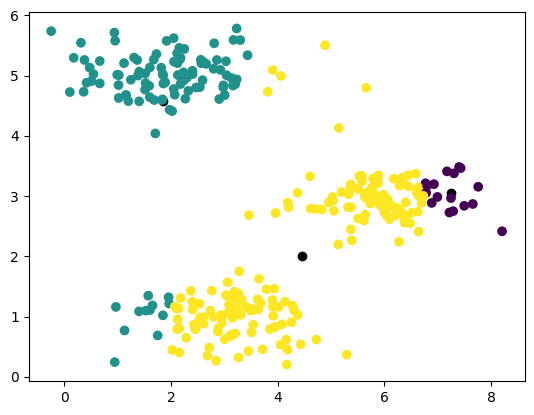

[array([6.45631427, 2.99678142]), array([1.97347434, 4.99174242]), array([3.57437733, 1.47497475])]


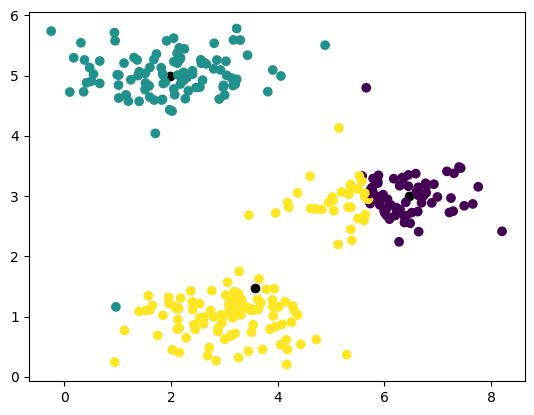

[array([6.11869857, 3.00745268]), array([1.95399466, 5.02557006]), array([3.10789564, 1.10202213])]


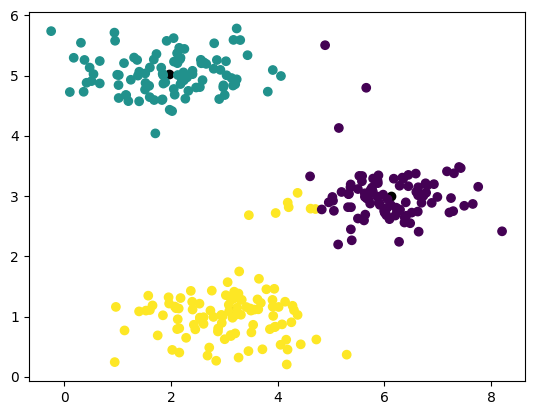

[array([6.03366736, 3.00052511]), array([1.95399466, 5.02557006]), array([3.04367119, 1.01541041])]


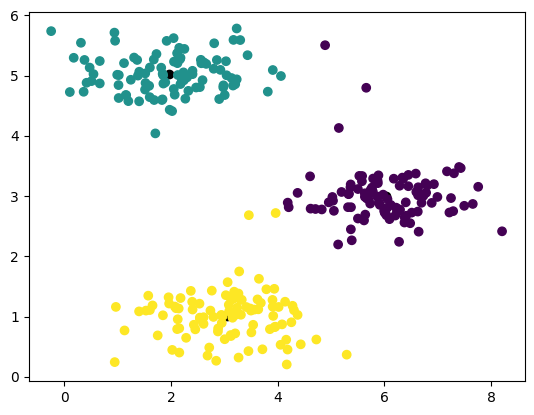

[array([6.03366736, 3.00052511]), array([1.95399466, 5.02557006]), array([3.04367119, 1.01541041])]


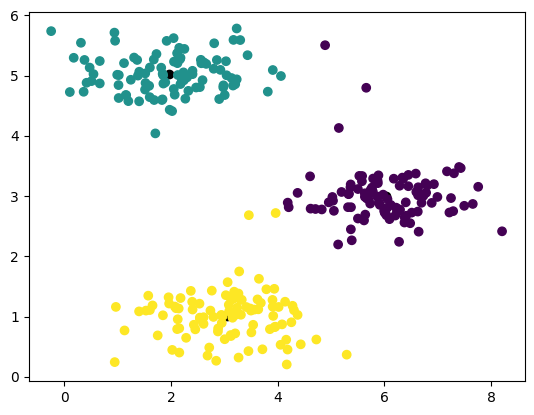

[array([6.03366736, 3.00052511]), array([1.95399466, 5.02557006]), array([3.04367119, 1.01541041])]


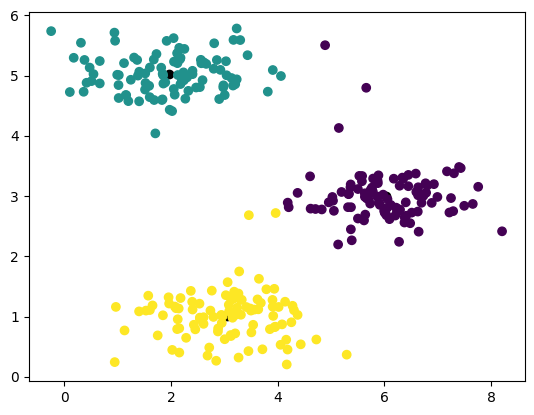

[array([6.03366736, 3.00052511]), array([1.95399466, 5.02557006]), array([3.04367119, 1.01541041])]


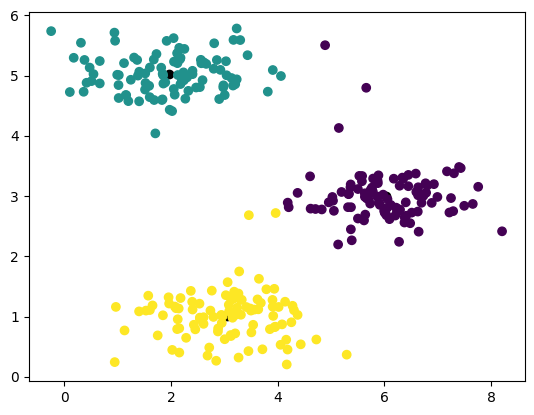

[array([6.03366736, 3.00052511]), array([1.95399466, 5.02557006]), array([3.04367119, 1.01541041])]


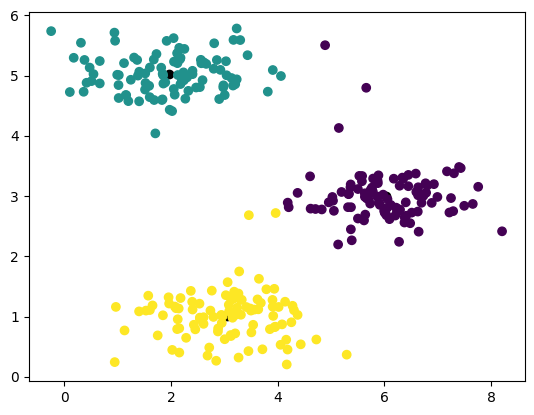

[array([6.03366736, 3.00052511]), array([1.95399466, 5.02557006]), array([3.04367119, 1.01541041])]


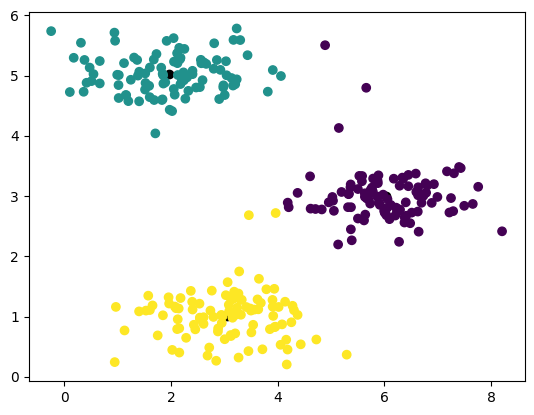

[array([6.03366736, 3.00052511]), array([1.95399466, 5.02557006]), array([3.04367119, 1.01541041])]


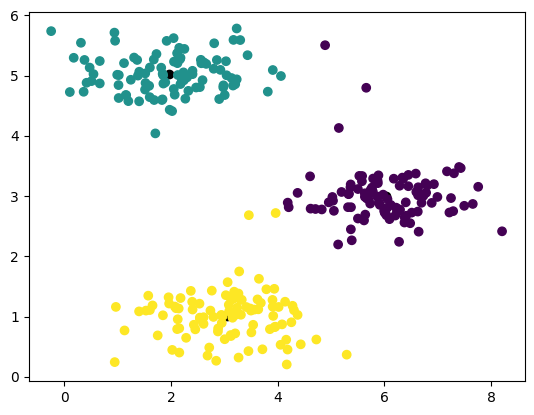

In [8]:
for i in range(10):
  assigned_centroid = find_closest_centroid(centroids,X)
  centroids = new_centroid(assigned_centroid,X)
  print(centroids)
  plt.figure()
  plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1], color = "black")
  plt.scatter(X[:,0],X[:,1],c=assigned_centroid)
  plt.show()

In [9]:
import cv2
img = cv2.imread('/content/tom.jpeg')
img.shape

(200, 200, 3)

In [10]:
im = (img/255).reshape(200*200,3)
innitial_centroids = random.sample(range(0,len(im)),6)

In [11]:
centroids = []
for i in innitial_centroids:
  centroids.append(im[i])
centroids

[array([0.10588235, 0.81568627, 0.78431373]),
 array([0.17647059, 0.54117647, 0.90588235]),
 array([0.25882353, 0.67058824, 0.7254902 ]),
 array([0.        , 0.00784314, 0.91372549]),
 array([0.02352941, 0.08235294, 0.56470588]),
 array([0.38823529, 0.41960784, 0.48627451])]

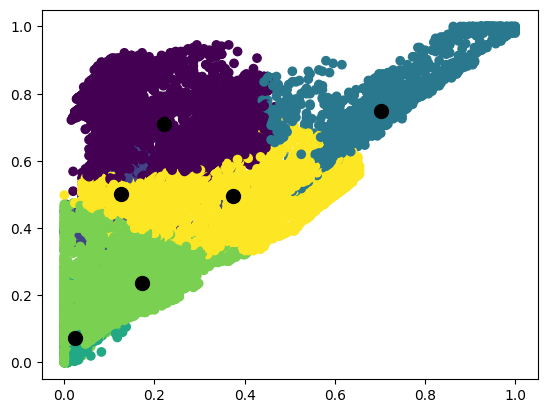

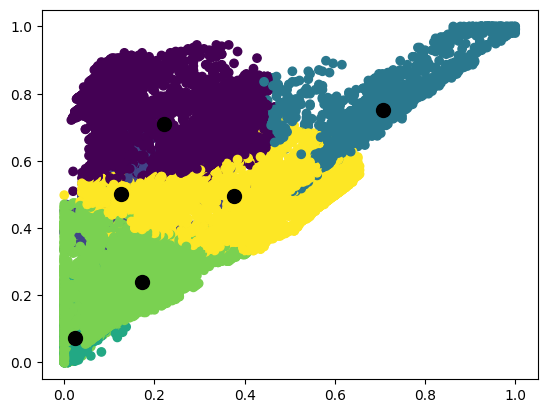

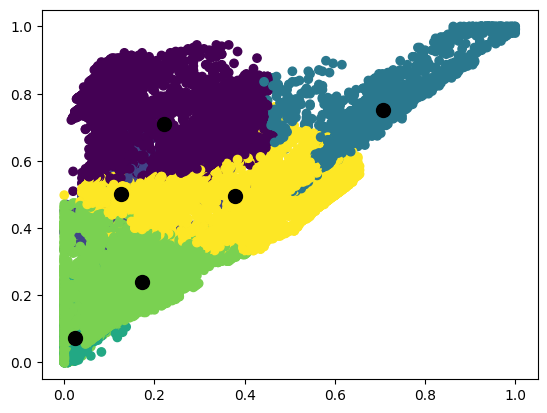

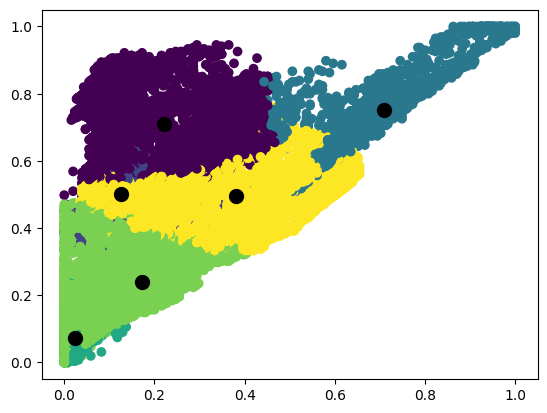

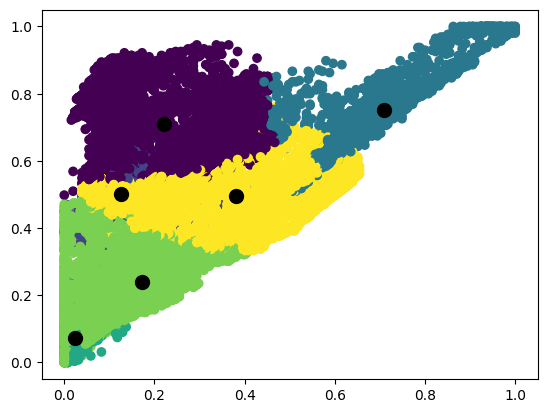

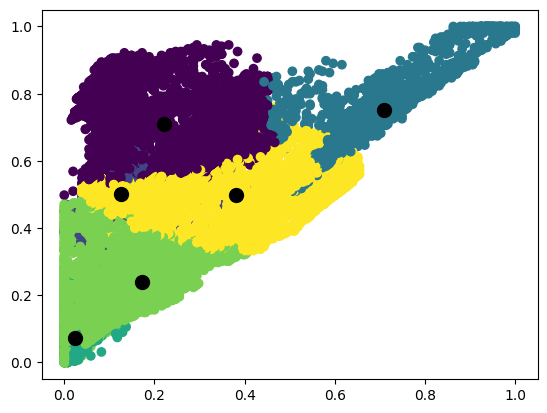

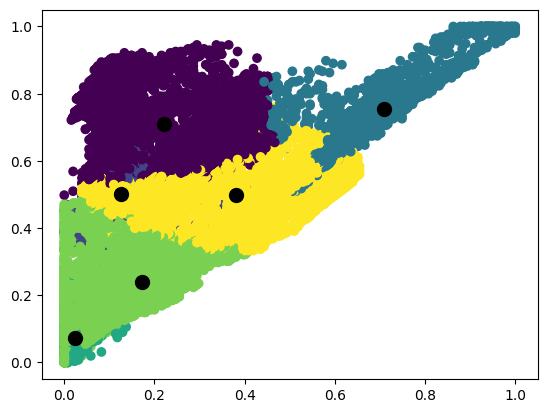

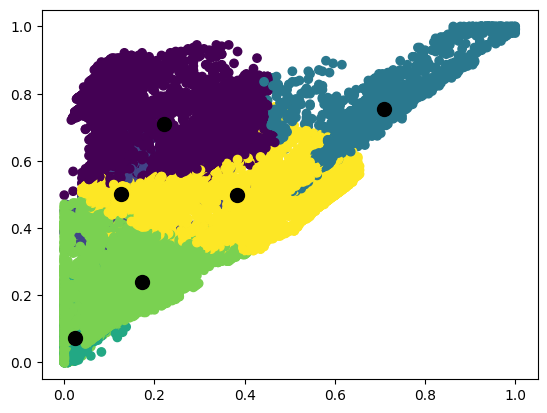

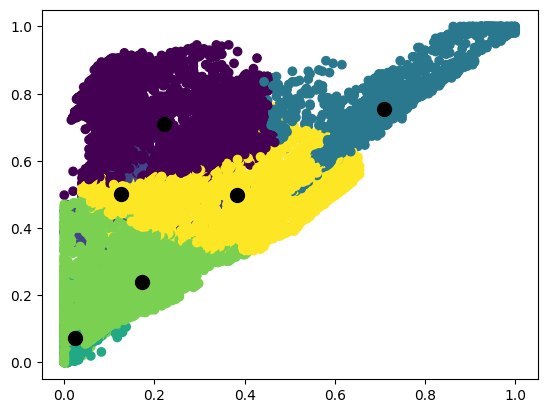

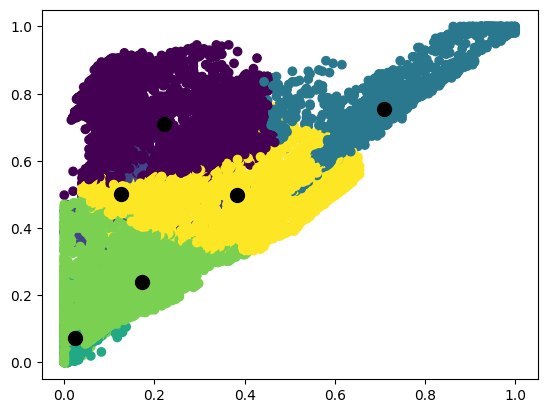

In [14]:
X = np.array(im)
for i in range(10):
  assigned_centroid = find_closest_centroid(centroids,X)
  centroids = new_centroid(assigned_centroid,X)
  plt.figure()
  plt.scatter(X[:,0], X[:,1], c = assigned_centroid)
  plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1], color='black', s=100)
  plt.show()

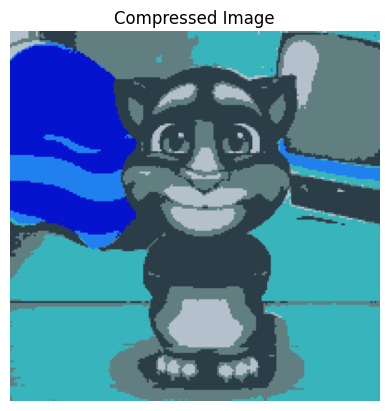

In [15]:
im_recovered = np.array(centroids)[assigned_centroid].reshape(200, 200, 3)
plt.imshow(im_recovered)
plt.axis('off')
plt.title('Compressed Image')
plt.show()